# Test Results

These are the results for the IONOSPHERE dataset. The dataset has 34 attributes, and we set a goal of 24 attributes. These tests were limited to 5 minutes.

In [20]:
import math
n = 34
k = 24
print("There are total:", sum(math.comb(n,i) for i in range(k,n+1)), "infeasible solutions")
print("There are total:", math.comb(n,k), "feasible solutions")

There are total: 208791332 infeasible solutions
There are total: 131128140 feasible solutions


## Testing different solvers

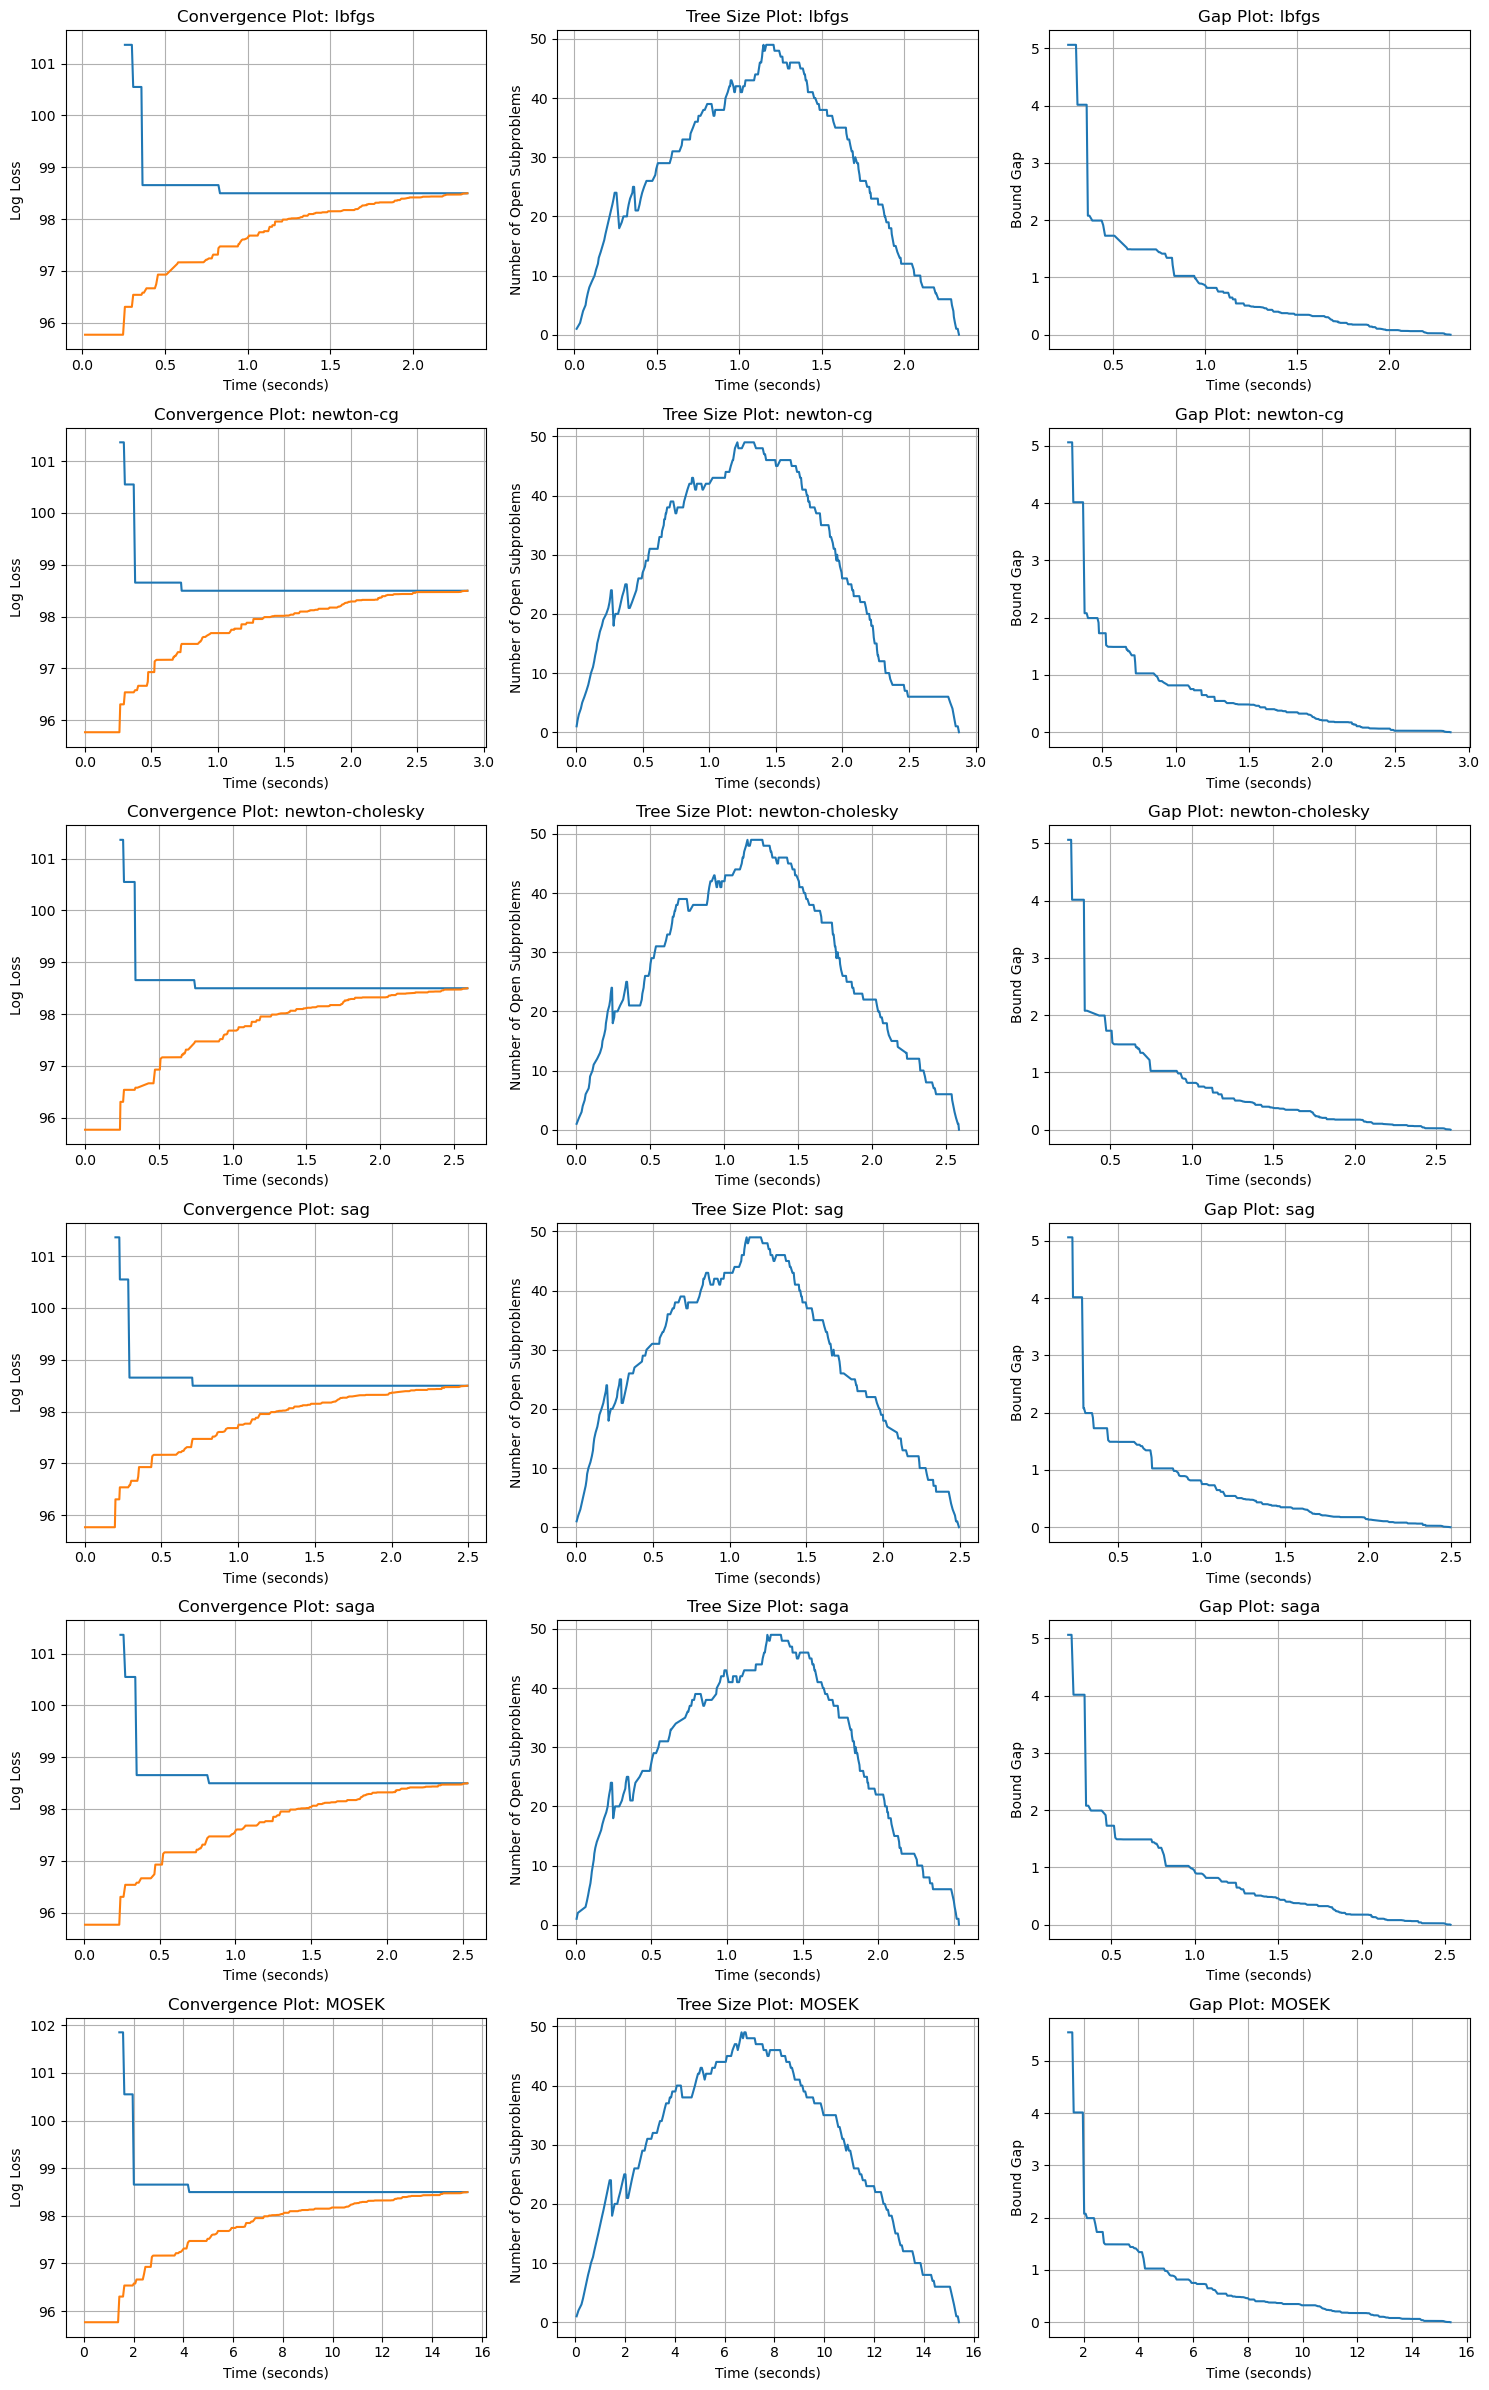

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

solvers = ("lbfgs", "newton-cg", "newton-cholesky", "sag", "saga", "MOSEK")

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 24))

for i, solver in enumerate(solvers):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ax3 = axes[i,2]


    df = pd.read_csv(f"test_data/test_ionosphere_{solver}_leastFractional_None_24.csv")

    # Plot 1
    ax1.plot(df['time'], df['UB'], label='Upper Bound')
    ax1.plot(df['time'], df['LB'], label='Lower Bound')
    ax1.set_title(f'Convergence Plot: {solver}')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Log Loss')
    ax1.grid(True)

    # Plot 2
    ax2.plot(df['time'], df['num_subproblems'])#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot: {solver}')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.grid(True)

    # Plot 3
    ax3.plot(df['time'], df['UB'] - df['LB'], label='Gap')
    ax3.set_title(f'Gap Plot: {solver}')
    ax3.set_xlabel('Time (seconds)')
    ax3.set_ylabel('Bound Gap')
    ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## Testing Initial UB Heuristics

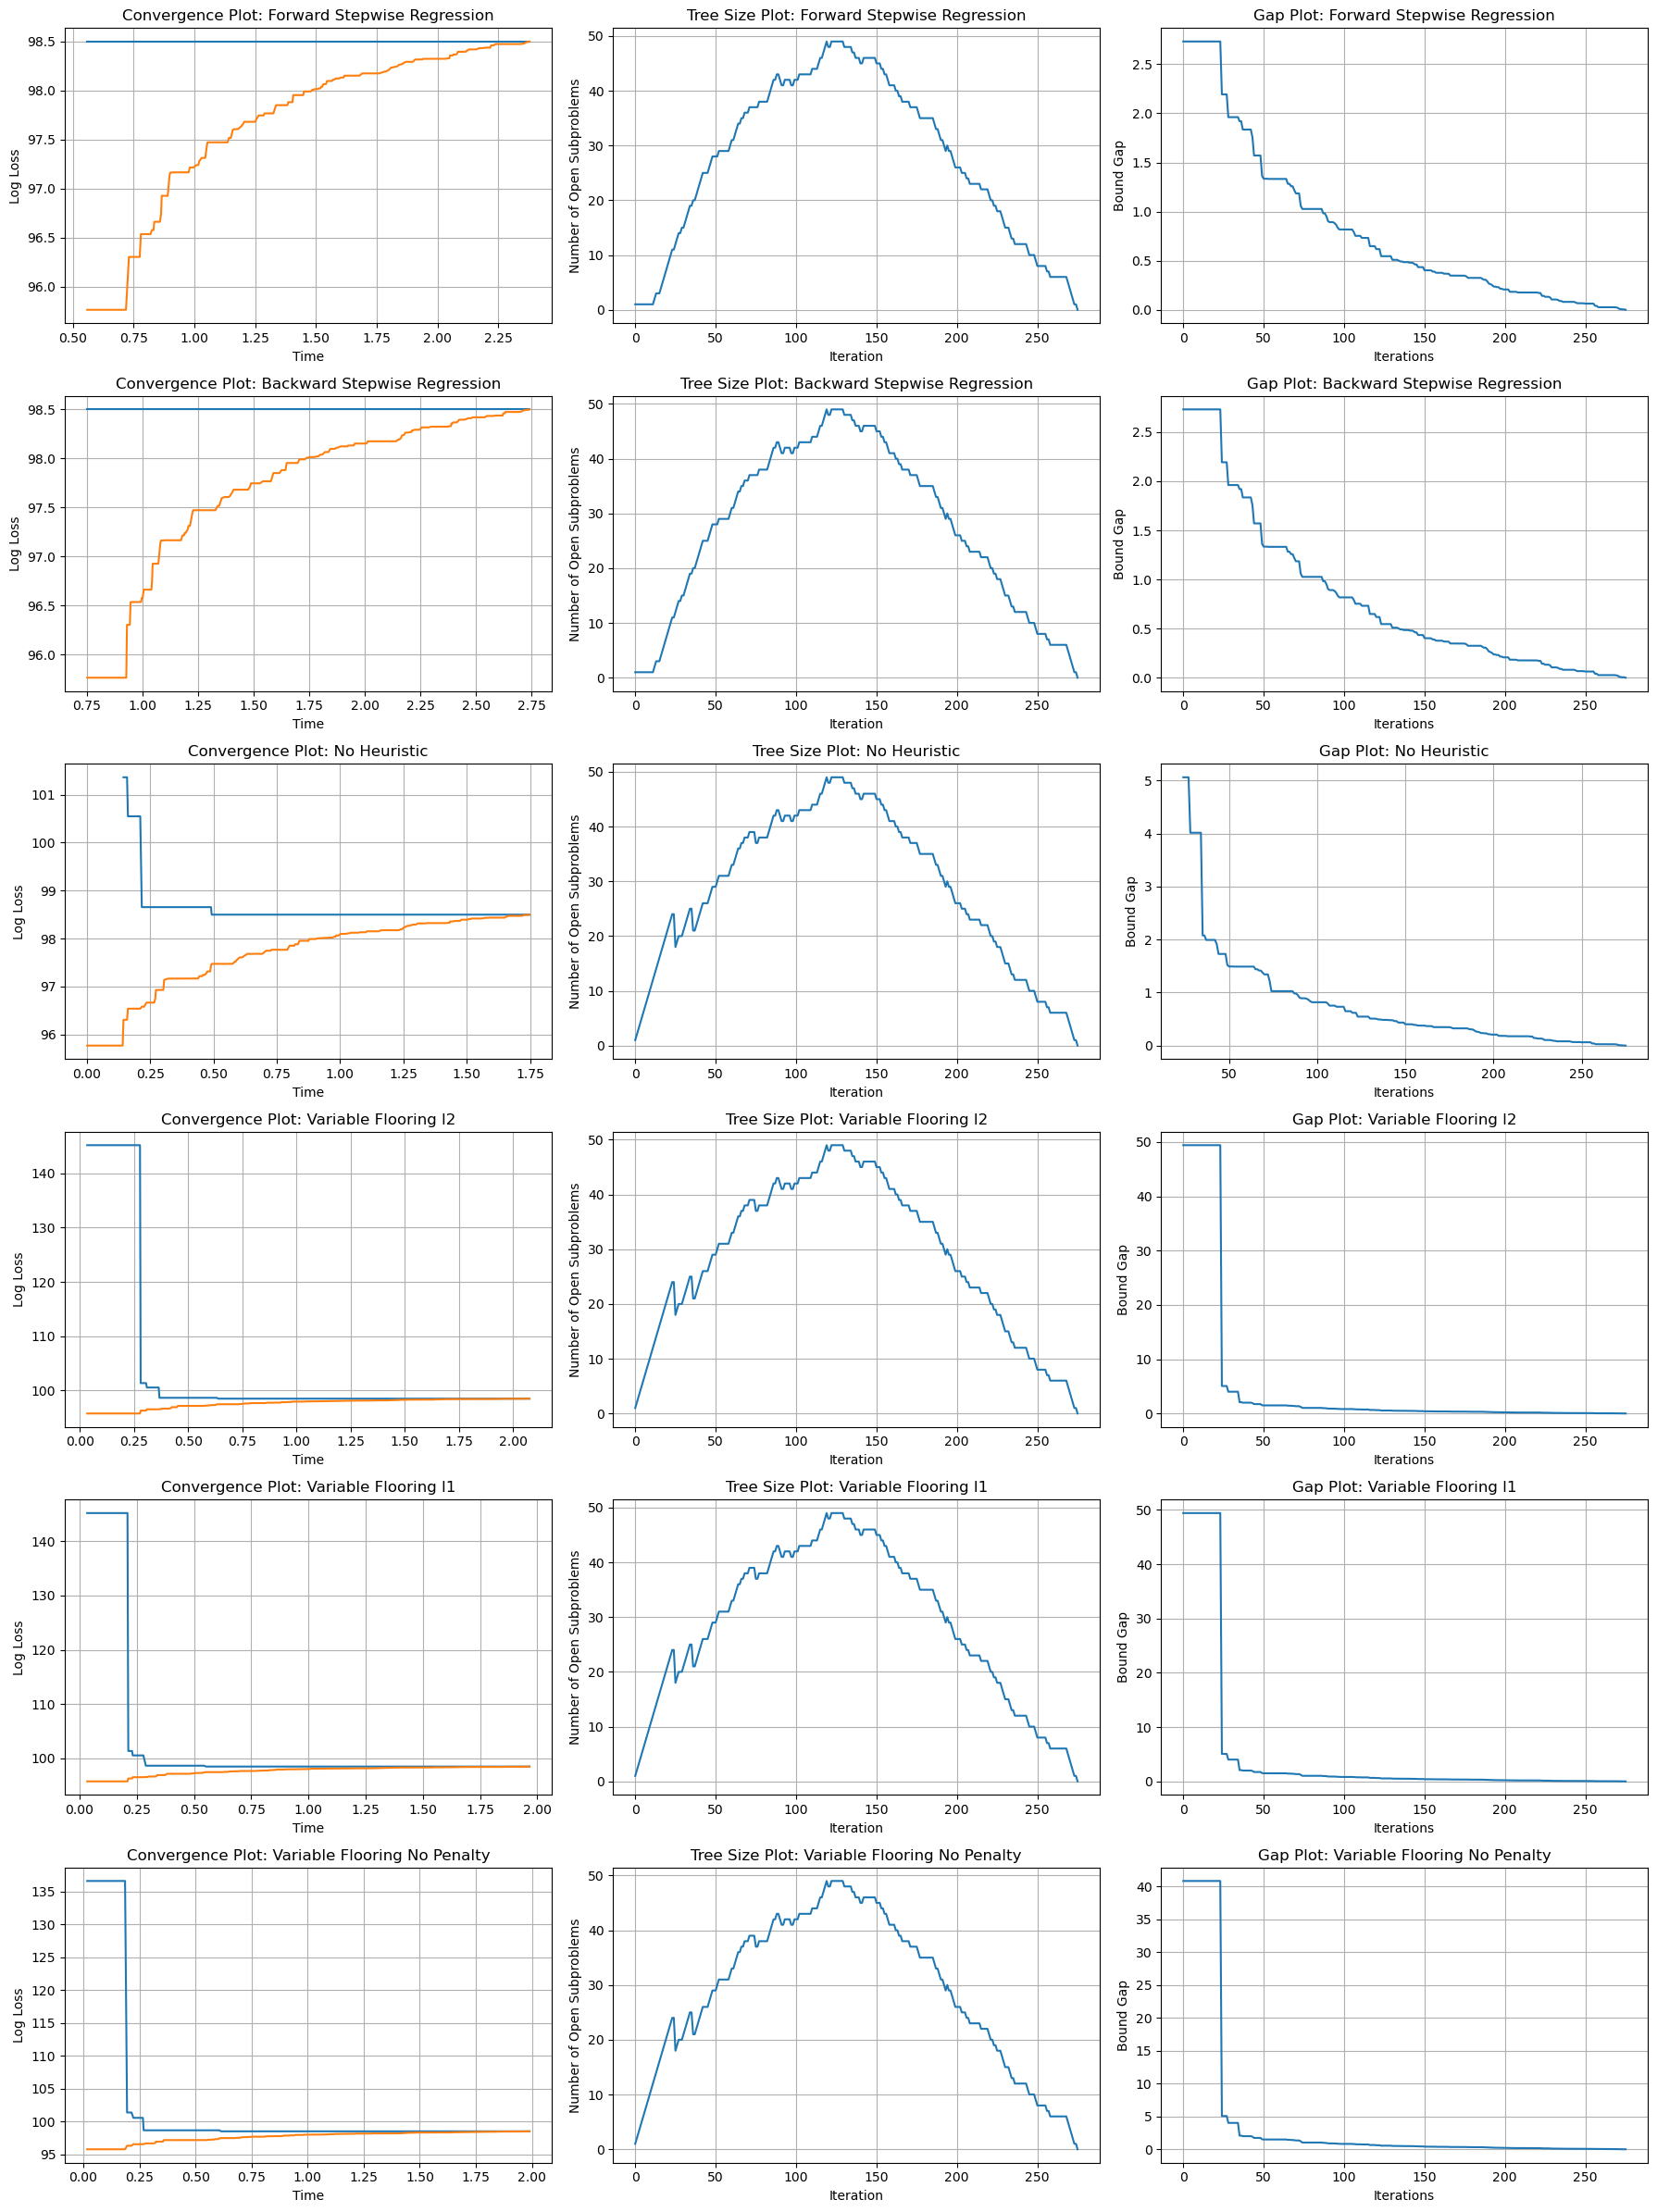

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

heuristics = ("Forward Stepwise Regression", "Backward Stepwise Regression", "No Heuristic", "Variable Flooring l2",
    "Variable Flooring l1",
    #"Variable Flooring Elasticnet": VariableFlooring(problem_data, "elasticnet"),
    "Variable Flooring No Penalty")

fig, axes = plt.subplots(nrows=len(heuristics), ncols=3, figsize=(18, 4*len(heuristics))) 


for i, heuristic in enumerate(heuristics):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ax3 = axes[i, 2]

    df = pd.read_csv(f"test_data/test_ionosphere_sklearn_sklearn_LeastFractional_{heuristic}_24.csv")

    # Plot 1
    ax1.plot(df['time'], df['UB'], label='Upper Bound')
    ax1.plot(df['time'], df['LB'], label='Lower Bound')
    ax1.set_title(f'Convergence Plot: {heuristic}')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Log Loss')
    ax1.grid(True)

    # Plot 2
    ax2.plot(df['iteration'], df['num_subproblems'])#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot: {heuristic}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.grid(True)

    # Plot 3
    ax3.plot(df['iteration'], df['UB'] - df['LB'], label='Gap')
    ax3.set_title(f'Gap Plot: {heuristic}')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Bound Gap')
    ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Testing Variable Selection Heuristics

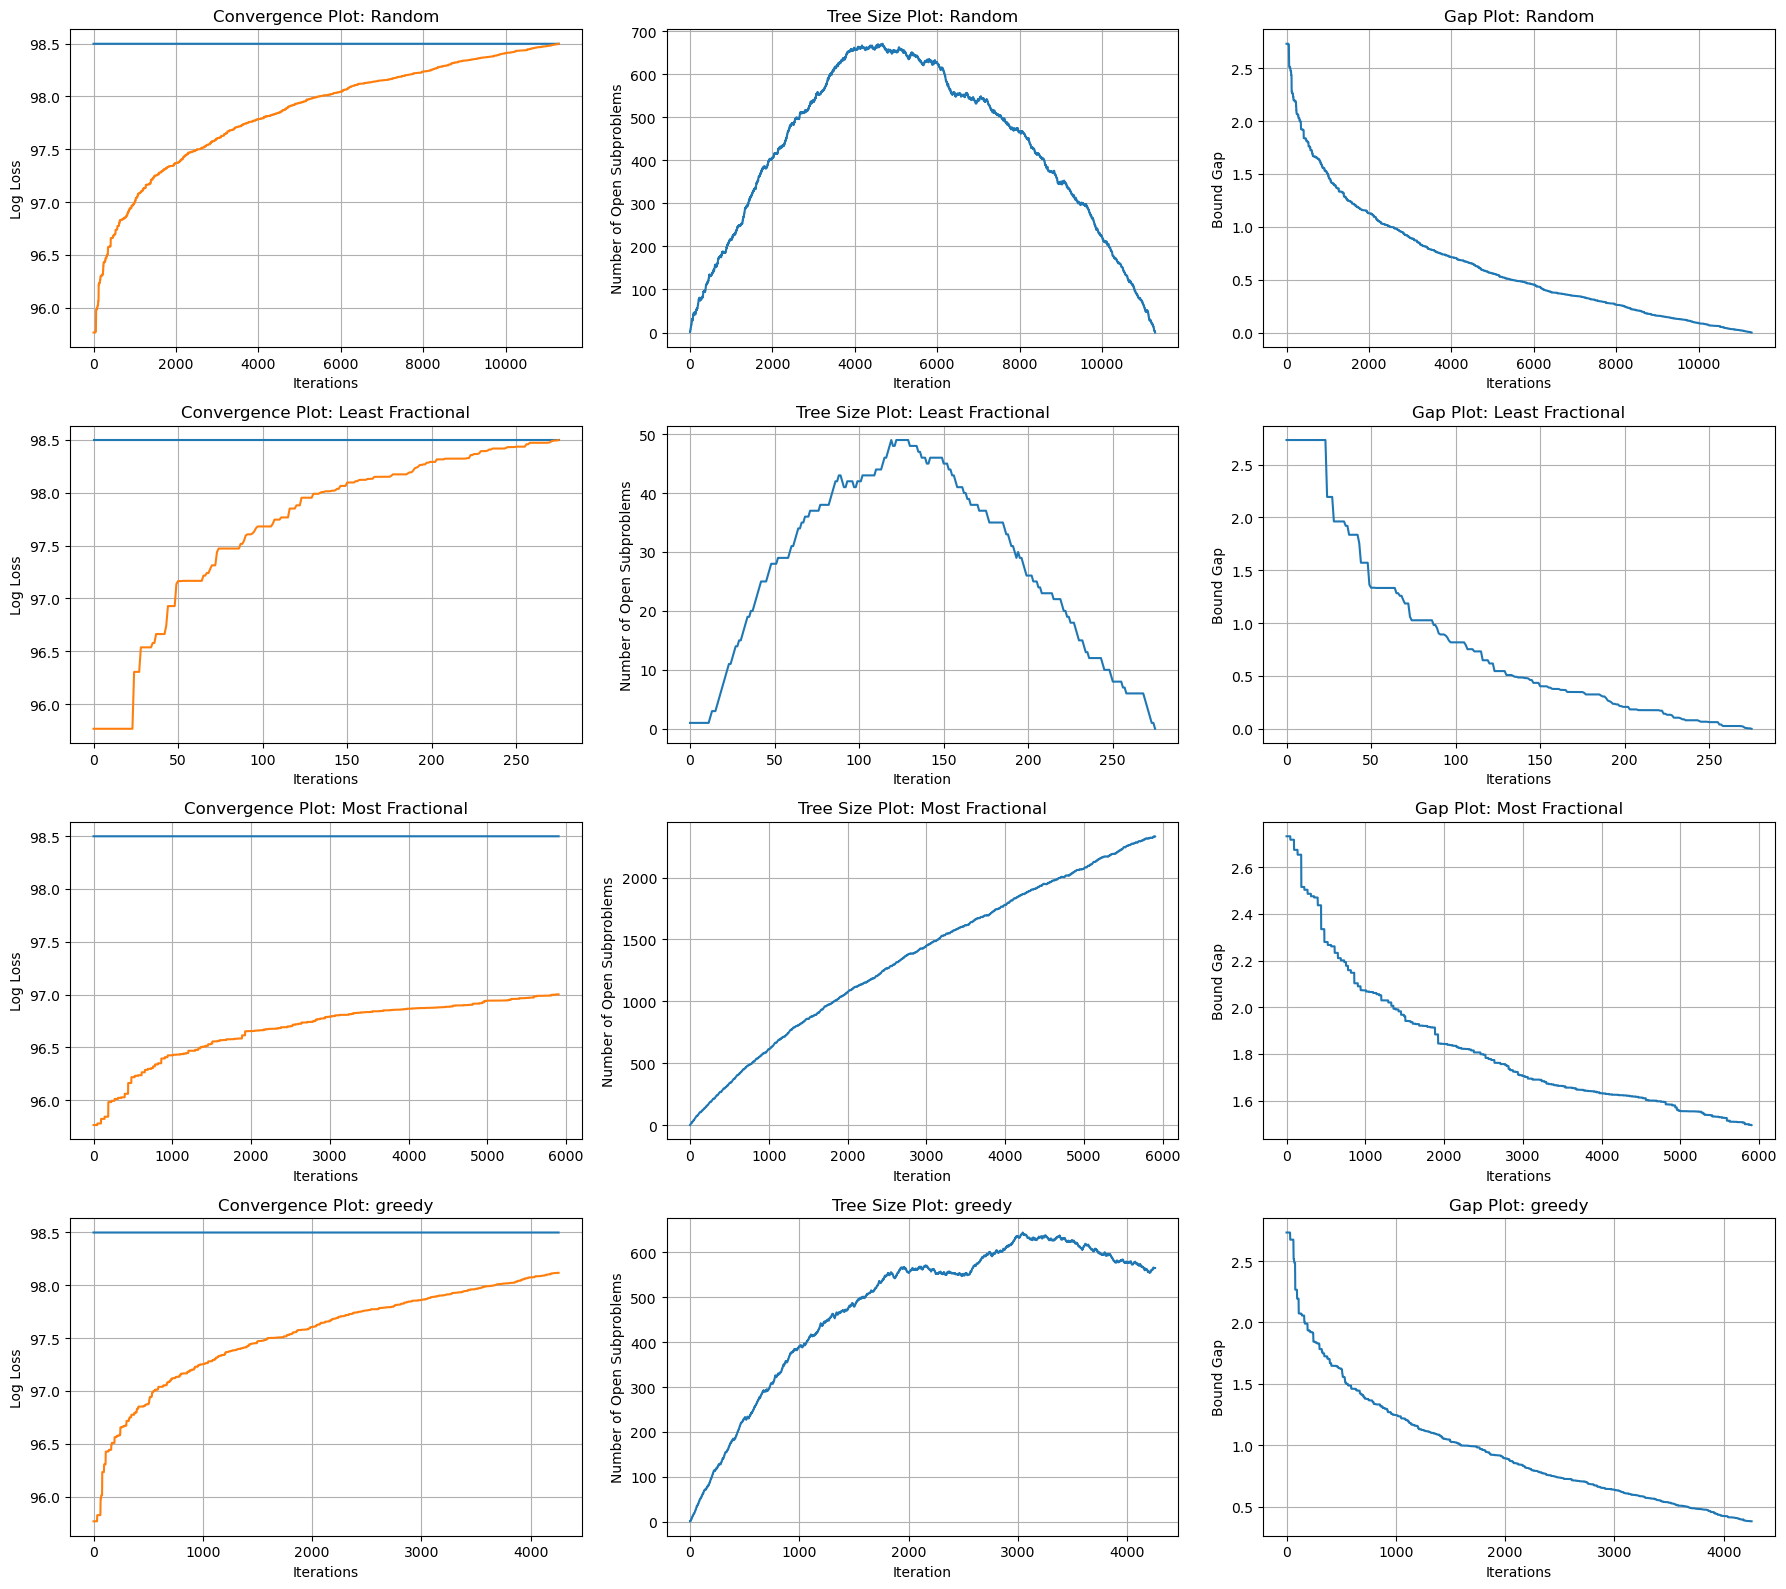

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

heuristics = ("Random",
    "Least Fractional",
    "Most Fractional",
    "greedy")

fig, axes = plt.subplots(nrows=len(heuristics), ncols=3, figsize=(18, 4*len(heuristics))) 


for i, heuristic in enumerate(heuristics):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ax3 = axes[i, 2]

    df = pd.read_csv(f"test_data/test_ionosphere_sklearn_sklearn_{heuristic}_backwardSelection_24.csv")

    # Plot 1
    ax1.plot(df['iteration'], df['UB'], label='Upper Bound')
    ax1.plot(df['iteration'], df['LB'], label='Lower Bound')
    ax1.set_title(f'Convergence Plot: {heuristic}')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Log Loss')
    ax1.grid(True)

    # Plot 2
    ax2.plot(df['iteration'], df['num_subproblems'])#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot: {heuristic}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.grid(True)

    # Plot 3
    ax3.plot(df['iteration'], df['UB'] - df['LB'], label='Gap')
    ax3.set_title(f'Gap Plot: {heuristic}')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Bound Gap')
    ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

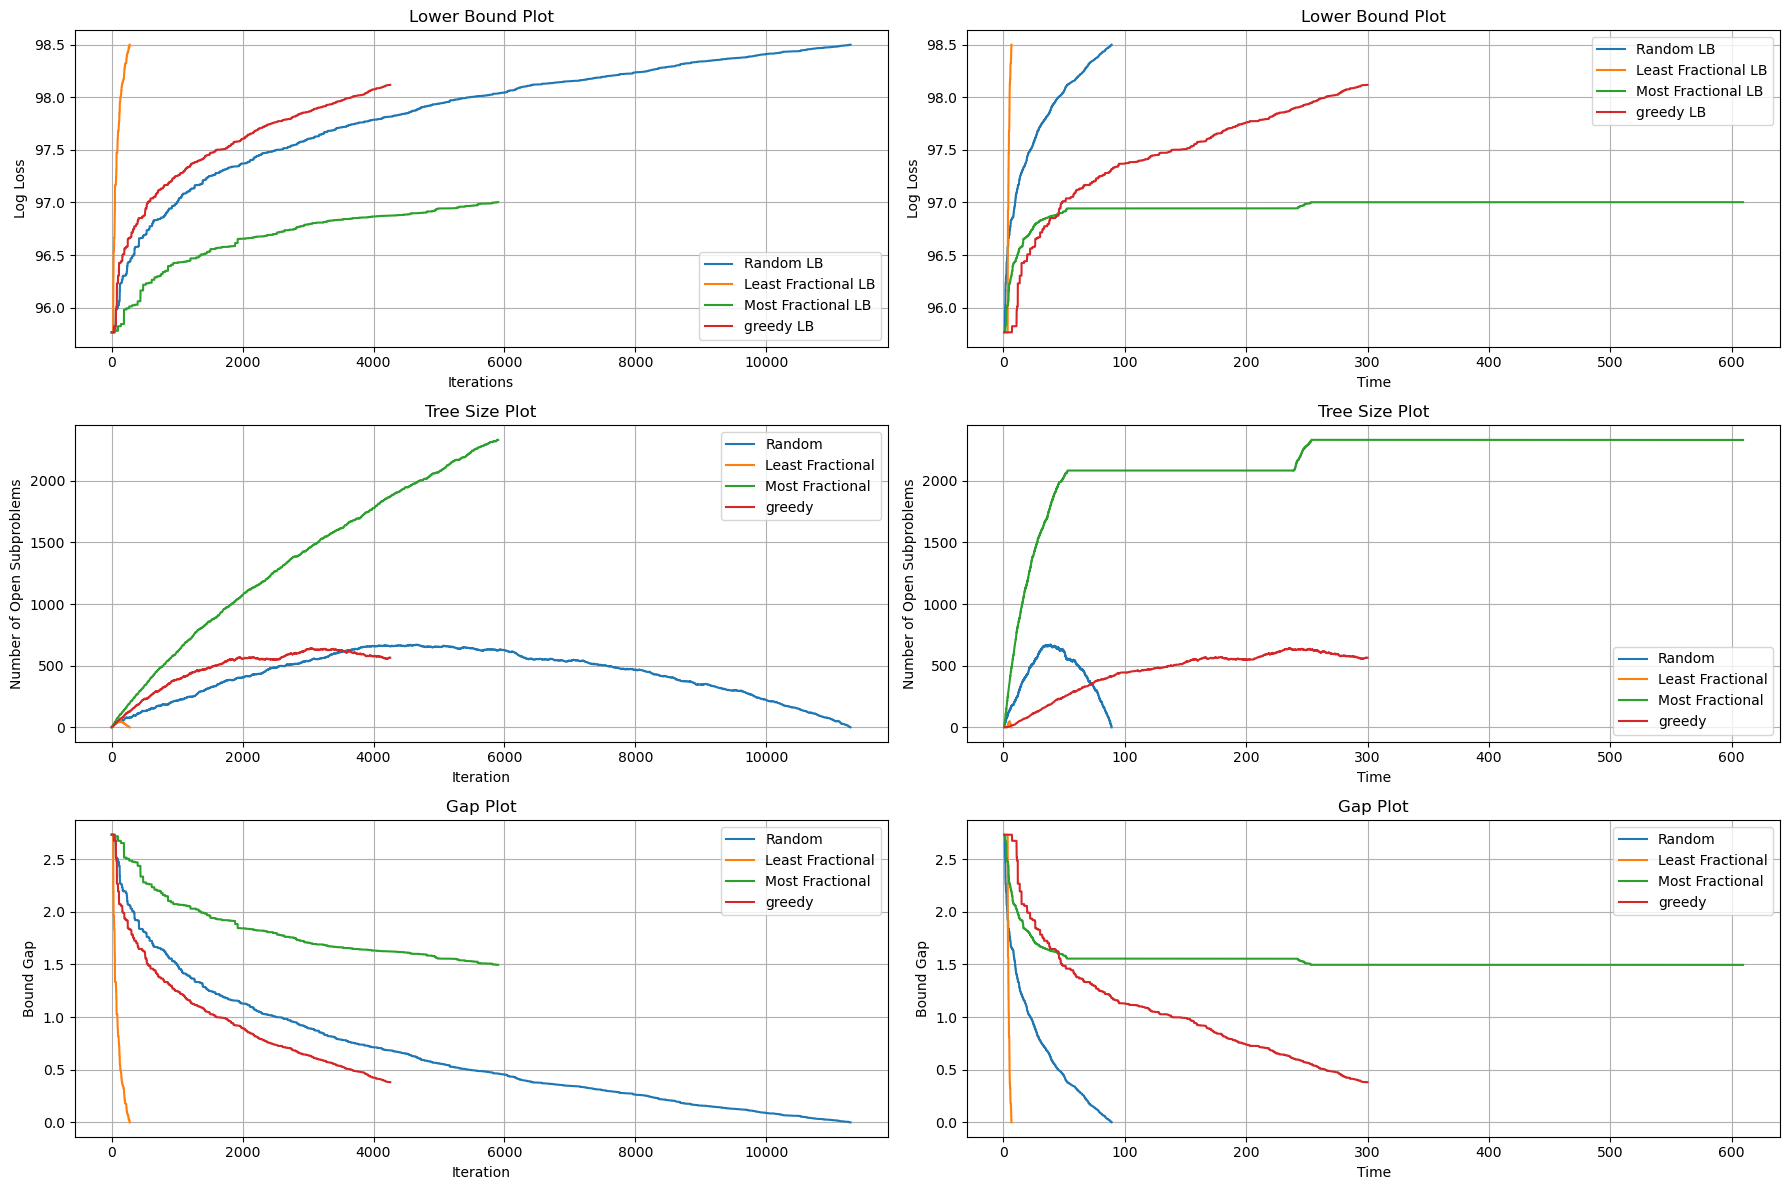

In [16]:
# Condensed
import pandas as pd
import matplotlib.pyplot as plt

heuristics = ("Random",
    "Least Fractional",
    "Most Fractional",
    "greedy")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12)) 


for i, heuristic in enumerate(heuristics):
    ax1 = axes[0, 0]
    ax4 = axes[0, 1]
    ax2 = axes[1, 0]
    ax5 = axes[1, 1]
    ax3 = axes[2, 0]
    ax6 = axes[2, 1]

    df = pd.read_csv(f"test_data/test_ionosphere_sklearn_sklearn_{heuristic}_backwardSelection_24.csv")

    # Plot 1
    # ax1.plot(df['iteration'], df['UB'], label=f'{heuristic} UB')
    ax1.plot(df['iteration'], df['LB'], label=f'{heuristic} LB')
    ax1.set_title(f'Lower Bound Plot')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Log Loss')
    ax1.legend()
    ax1.grid(True)

    # ax4.plot(df['time'], df['UB'], label=f'{heuristic} UB')
    ax4.plot(df['time'], df['LB'], label=f'{heuristic} LB')
    ax4.set_title(f'Lower Bound Plot')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Log Loss')
    ax4.legend()
    ax4.grid(True)

    # Plot 2
    ax2.plot(df['iteration'], df['num_subproblems'], label=heuristic)#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.legend()
    ax2.grid(True)

    ax5.plot(df['time'], df['num_subproblems'], label=heuristic)#, label='Number of Open Subproblems')
    ax5.set_title(f'Tree Size Plot')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Number of Open Subproblems')
    ax5.legend()
    ax5.grid(True)

    # Plot 3
    ax3.plot(df['iteration'], df['UB'] - df['LB'], label=heuristic)
    ax3.set_title(f'Gap Plot')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Bound Gap')
    ax3.legend()
    ax3.grid(True) 

    ax6.plot(df['time'], df['UB'] - df['LB'], label=heuristic)
    ax6.set_title(f'Gap Plot')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Bound Gap')
    ax6.legend()
    ax6.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

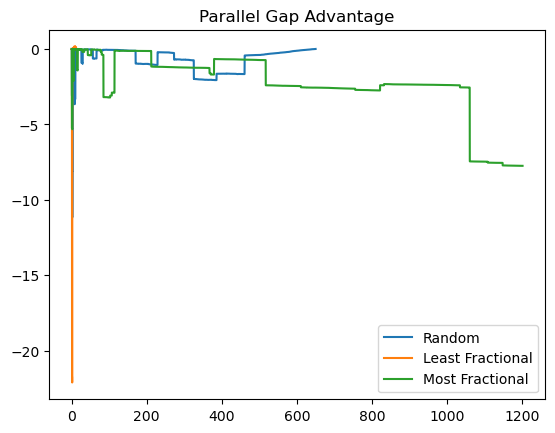

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

heuristics = ("Random",
    "Least Fractional",
    "Most Fractional")

for i, var_selector in enumerate(heuristics):

    df1 = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_SPECT_HEART_MOSEK_{var_selector}_Variable Flooring l2_11.csv")
    df2 = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_parallel_SPECT_HEART_MOSEK_{var_selector}_Variable Flooring l2_11.csv")

    df1['gap'] = df1['UB'] - df1['LB']
    df2['gap'] = df2['UB'] - df2['LB']

    all_times = sorted(set(df1['time']).union(set(df2['time'])))

    # 2. Reindex both DataFrames to align on this full time range, using forward fill
    df1_interp = df1.set_index('time').reindex(all_times).ffill().reset_index()
    df2_interp = df2.set_index('time').reindex(all_times).ffill().reset_index()



    plt.plot(df1_interp['time'], - df2_interp['gap'] + df1_interp['gap'] , label=var_selector)
    # #plt.plot(df2['time'], df2['UB'] - df2['LB'], label=f'Parallel')

    #plt.plot(df1_interp['time'], df2_interp['iteration'] - df1_interp['iteration'], label=var_selector)
    #plt.plot(df2['time'], df2['iteration'], label=f'Parallel')


plt.title("Parallel Gap Advantage")
plt.legend()
#plt.title("Parallel Iteration Advantage")
#plt.legend()

#plt.tight_layout()
plt.show()

0.32920876825658296
1374.9268865900258


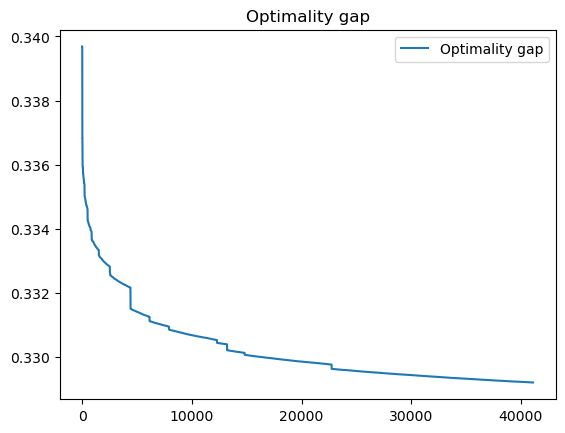

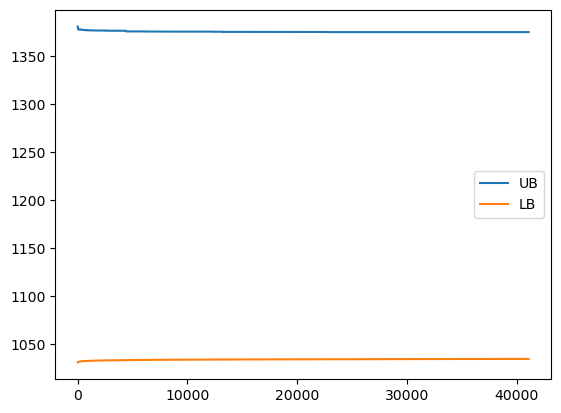

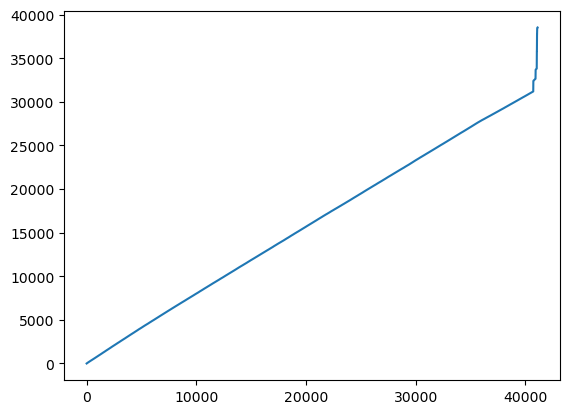

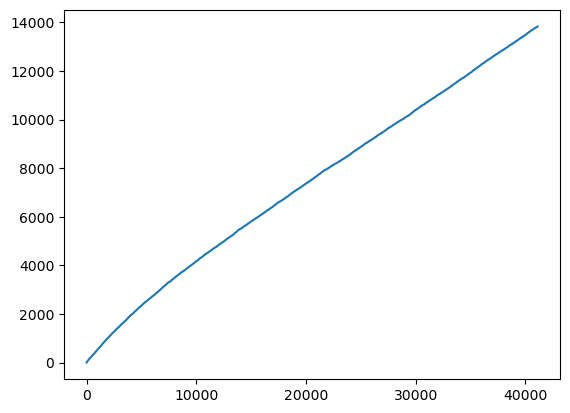

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

df1 = pd.read_csv(f"test_data/test_MADELON_MOSEK_Least Fractional_Variable Flooring l2_10.csv")

df1['gap'] = (df1['UB'] - df1['LB']) / df1['LB']
print(df1['gap'].min())
print(df1['UB'].min())

#plt.plot(df1['iteration'], df1['UB'] , label="Upper Bound")
#plt.plot(df1['iteration'], df1['LB'] , label="Lower Bound")
# #plt.plot(df2['time'], df2['UB'] - df2['LB'], label=f'Parallel')

#plt.plot(df1_interp['time'], df2_interp['iteration'] - df1_interp['iteration'], label=var_selector)
plt.plot( df1['iteration'], df1['gap'], label=f'Optimality gap')


plt.title("Optimality gap")
plt.legend()
#plt.title("Parallel Iteration Advantage")
#plt.legend()

#plt.tight_layout()
plt.show()

plt.plot(df1['iteration'], df1['UB'], label=f'UB')
plt.plot(df1['iteration'], df1['LB'], label=f'LB')
plt.legend()
plt.show()

plt.plot(df1['iteration'], df1['time'])

plt.show()

plt.plot(df1['iteration'], df1['num_subproblems'])


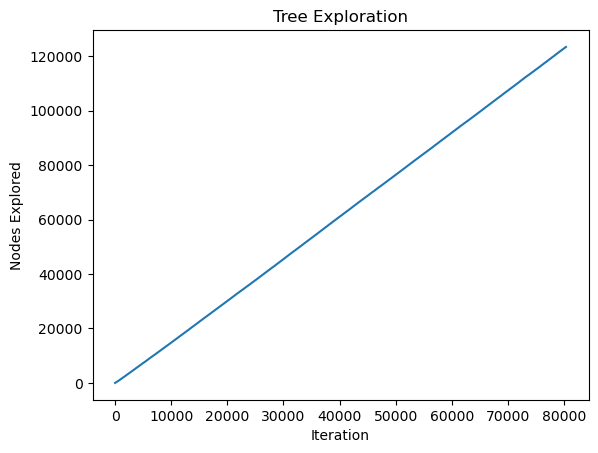

In [152]:
plt.clf()        # Clear the current figure
plt.close()      # Close the window (if needed)
import numpy as np

# Step 1: Convert strings to integers (safer than float for exact values)
df1["remaining_tree_size"] = df1["remaining_tree_size"].apply(int)

# Step 2: Subtract from the max value
max_val = df1["remaining_tree_size"].max()
df1["tree_percent"] = df1["remaining_tree_size"].apply(lambda x: (max_val - x))



plt.plot(df1["iteration"], df1["tree_percent"])
plt.xlabel("Iteration")
plt.ylabel("Nodes Explored")
plt.title("Tree Exploration")
plt.show()


In [164]:
import math
n = 500
k = 10
    
def tree_size(n,k):
    return 2 * math.comb(n, k) - 1

print(491621177603782195794 - tree_size(500,10))

print(sum(range(10,35)))

-1605
550


0.001830590597172076
119.0553561193059


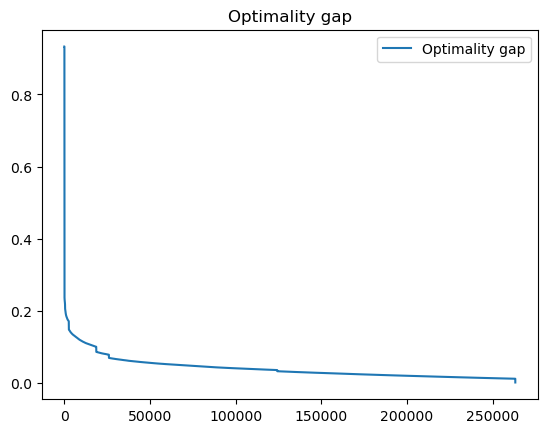

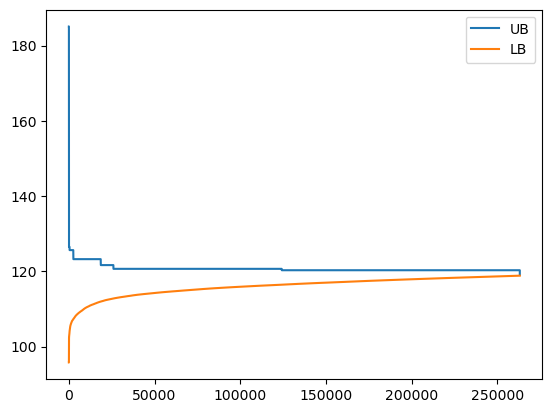

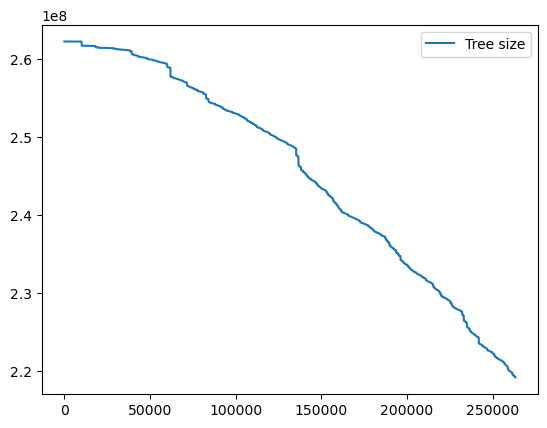

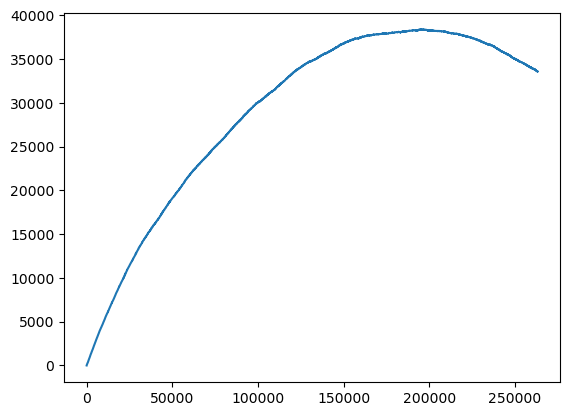

In [178]:


import pandas as pd
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

df1 = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_IONOSPHERE_MOSEK_Least Fractional_Variable Flooring l2_10.csv")

df1['gap'] = (df1['UB'] - df1['LB']) / df1['LB']
print(df1['gap'].min())
print(df1['UB'].min())

#plt.plot(df1['iteration'], df1['UB'] , label="Upper Bound")
#plt.plot(df1['iteration'], df1['LB'] , label="Lower Bound")
# #plt.plot(df2['time'], df2['UB'] - df2['LB'], label=f'Parallel')

#plt.plot(df1_interp['time'], df2_interp['iteration'] - df1_interp['iteration'], label=var_selector)
plt.plot( df1['iteration'], df1['gap'], label=f'Optimality gap')


plt.title("Optimality gap")
plt.legend()
#plt.title("Parallel Iteration Advantage")
#plt.legend()

#plt.tight_layout()
plt.show()

plt.plot(df1['iteration'], df1['UB'], label=f'UB')
plt.plot(df1['iteration'], df1['LB'], label=f'LB')
plt.legend()
plt.show()

plt.plot(df1['iteration'], df1['remaining_tree_size'], label=f'Tree size')
plt.legend()
plt.show()

plt.plot(df1['iteration'], df1['num_subproblems'])



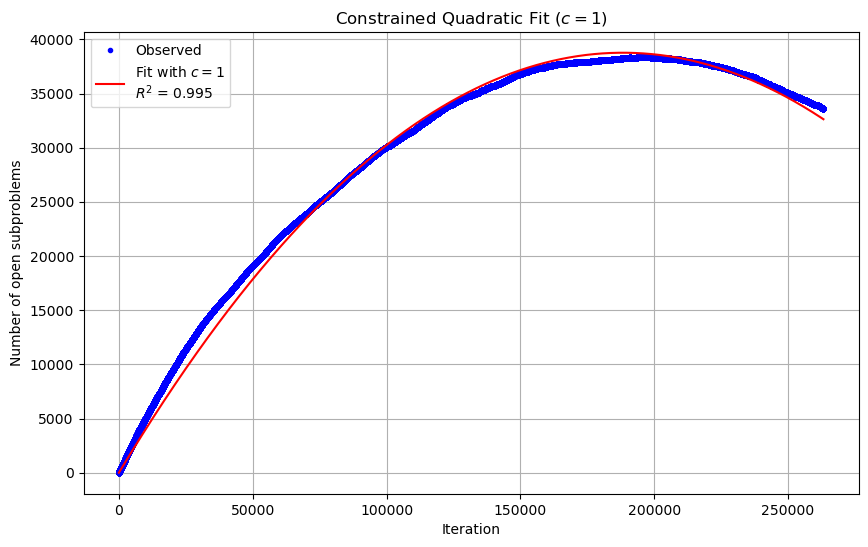

Fitted: y = -1.094e-06 x² + 4.118e-01 x + 1


In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Extract data
x = df1['iteration'].to_numpy()
y = df1['num_subproblems'].to_numpy()

# Subtract fixed constant from y to get adjusted target
y_adj = y - 1  # because we're fixing c = 1

# Design matrix for a*x^2 + b*x
X = np.vstack([x**2, x]).T

# Solve least squares problem: X @ [a, b] = y - 1
ab, residuals, _, _ = np.linalg.lstsq(X, y_adj, rcond=None)
a, b = ab

# Reconstruct fitted curve with c = 1
y_fit = a * x**2 + b * x + 1

# R² score
r2 = r2_score(y, y_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b.', label='Observed')
plt.plot(x, y_fit, 'r-', label=f'Fit with $c=1$\n$R^2$ = {r2:.3f}')
plt.xlabel('Iteration')
plt.ylabel('Number of open subproblems')
plt.title('Constrained Quadratic Fit ($c = 1$)')
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients
print(f"Fitted: y = {a:.3e} x² + {b:.3e} x + 1")


In [14]:
datasets = {
    "MADELON": {
        "features": 500,
        "rows": 4400,
        "results": {
            
        }
                },
    "SPECT_HEART": {
        "features": 22,
        "rows": 267,
        "results": {
            
        }
                },
    "IONOSPHERE": {
        "features": 34,
        "rows": 351,
        "results": {
            
        }
                },
    "MYOCARDIAL": {
        "features": 111,
        "rows": 1700,
        "results": {
            
        }
                }
}

queue = []
import os, math
import pandas as pd

#datasets = ("SPECT_HEART", "IONOSPHERE", "MADELON", "MYOCARDIAL")
var_selectors = {
    "Least Fractional",
    "Most Fractional",
    "Random",
    "Most correlated",
    "Least correlated",
    "Greedy Minimization l2",
    "Greedy Minimization No Penalty",
    "Greedy Maximization l2",
    "Greedy Maximization No Penalty"
}
initial_UB_heuristics = {
    "Variable Flooring l2",
    "No Heuristic",
    
    "Variable Flooring No Penalty",
    "Backward Stepwise Regression No Penalty",
    "Backward Stepwise Regression l2",
    "Forward Stepwise Regression No Penalty",
    "Forward Stepwise Regression l2",
}

for dataset in datasets.keys():
    for k_f in range(1,10):
        k = math.floor(datasets[dataset]["features"] * k_f/10)
        best_iter = math.inf
        conclusive=False
        for initial_UB_heuristic in initial_UB_heuristics:
            for var_selector in var_selectors:
                current_file = f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_{dataset}_MOSEK_{var_selector}_{initial_UB_heuristic}_{k}.csv"
                if os.path.exists(current_file):
                    actual_data = pd.read_csv(current_file)
                    actual_data["gap"] = (actual_data["UB"] - actual_data["LB"]) / actual_data["LB"]
                    if actual_data["gap"].min() < 0.0001:
                        conclusive = True
                        iter_count = actual_data[actual_data["gap"] < 0.0001]["iteration"].min()
                        if iter_count < best_iter:
                            best_iter = iter_count
                    else:
                        if not conclusive:
                            best_iter = min(actual_data['iteration'].min(), best_iter)
        if best_iter == math.inf:
            queue.append([dataset,k])

        else:
            datasets[dataset]["results"][k] = (best_iter, conclusive)




print(datasets)
print(queue)


{'MADELON': {'features': 500, 'rows': 4400, 'results': {250: (0, False)}}, 'SPECT_HEART': {'features': 22, 'rows': 267, 'results': {2: (81, True), 4: (269, True), 6: (336, True), 8: (266, True), 11: (107, True), 13: (74, True), 15: (28, True), 17: (18, True), 19: (21, True)}}, 'IONOSPHERE': {'features': 34, 'rows': 351, 'results': {3: (134, True), 6: (1042, True), 10: (2158, True), 13: (2238, True), 17: (0, True), 20: (503, True), 23: (273, True), 27: (159, True), 30: (32, True)}}, 'MYOCARDIAL': {'features': 111, 'rows': 1700, 'results': {11: (0, False)}}}
[['MADELON', 50], ['MADELON', 100], ['MADELON', 150], ['MADELON', 200], ['MADELON', 300], ['MADELON', 350], ['MADELON', 400], ['MADELON', 450], ['MYOCARDIAL', 22], ['MYOCARDIAL', 33], ['MYOCARDIAL', 44], ['MYOCARDIAL', 55], ['MYOCARDIAL', 66], ['MYOCARDIAL', 77], ['MYOCARDIAL', 88], ['MYOCARDIAL', 99]]


In [25]:


print("\\begin{tabular}{|lcc|ccccccccc|}")
print("\\toprule")
print("Dataset & Number of Features & Number of Instances & \\multicolumn{9}{l}{l0 Constraint} \\\\")
print("\\midrule")
for dataset in datasets.keys():
    print(dataset, "&", datasets[dataset]["features"], "&", datasets[dataset]["rows"], end = " ")
    # for k_f in range(1,10):
    #     k = math.floor(datasets[dataset]["features"] * k_f/10)
    #     print("&", k, end = "")
    # print("\\\\")
    #print("\\multicolumn{3}{|r|}{Iterations Until Convergence}")
    
    for k_f in range(1,10):
        k = math.floor(datasets[dataset]["features"] * k_f/10)
        if k in datasets[dataset]["results"].keys():
            print(f"&{k}, $>" if not datasets[dataset]["results"][k][1] else f"&{k}, $", datasets[dataset]["results"][k][0], "$", sep = "", end = "")
        else:
            print(f"&{k}, incomplete", end="")
    print("\\\\ \n \\hline")
print("\\end{tabular}")

\begin{tabular}{|lcc|ccccccccc|}
\toprule
Dataset & Number of Features & Number of Instances & \multicolumn{9}{l}{l0 Constraint} \\
\midrule
MADELON & 500 & 4400 &50, incomplete&100, incomplete&150, incomplete&200, incomplete&250, $>0$&300, incomplete&350, incomplete&400, incomplete&450, incomplete\\ 
 \hline
SPECT_HEART & 22 & 267 &2, $81$&4, $269$&6, $336$&8, $266$&11, $107$&13, $74$&15, $28$&17, $18$&19, $21$\\ 
 \hline
IONOSPHERE & 34 & 351 &3, $134$&6, $1042$&10, $2158$&13, $2238$&17, $0$&20, $503$&23, $273$&27, $159$&30, $32$\\ 
 \hline
MYOCARDIAL & 111 & 1700 &11, $>0$&22, incomplete&33, incomplete&44, incomplete&55, incomplete&66, incomplete&77, incomplete&88, incomplete&99, incomplete\\ 
 \hline
\end{tabular}


In [ ]:
indentation_counts = {}

def generate_tikz_tree(a, b):
    node_id = 0
    tikz_lines = []

    def recurse(a, b, indentation):
        # node_label = f"({a},{b})"
        # tikz_lines.append(f"node {{{node_label}}}")

        if a == 0 or b == 0:
            return  # leaf node, no children
        if a-1 == 0:
            tikz_lines.append(indentation + "child[sibling distance=5mm] {node{" + f"{a-1},{b}" + "}")
        else:
            tikz_lines.append(indentation + "child {node{" + f"{a-1},{b}" + "}")
        recurse(a - 1, b, indentation + "  ")  # left child
        tikz_lines.append(indentation + "} ")

        if b-1 == 0:
            tikz_lines.append(indentation + "child[sibling distance=5mm] {node{" + f"{a},{b-1}" + "}")
        else:
            tikz_lines.append(indentation + "child {node{" + f"{a},{b-1}" + "}")
        recurse(a, b - 1, indentation + "  ")  # right child
        tikz_lines.append(indentation + "} ")

    tikz_code = [
       "\\documentclass{standalone}",
        "\\usepackage{tikz}",
        "\\begin{document}",
        "\\begin{tikzpicture}[level distance=1.5cm,",
        #"every node/.style = {circle, draw, fill=blue!10}",
    ]

    for i in range(a + b):
        tikz_code.append(f"level {i+1}/.style=" + "{sibling distance=" + f"{5 * 2**(a+b-i-1)}" + "mm},")
    tikz_code.append("]")

    tikz_code.append("\\node{" + f"{a,b}" + "}")
    recurse(a, b, "  ")
    tikz_code.extend(tikz_lines)
    tikz_code.append(";")
    tikz_code.append("\\end{tikzpicture}")
    tikz_code.append("\\end{document}")

    return "\n".join(tikz_code)

print(generate_tikz_tree(2,4))

\documentclass{standalone}
\usepackage{tikz}
\begin{document}
\begin{tikzpicture}[level distance=1.5cm,
level 1/.style={sibling distance=40mm},
level 2/.style={sibling distance=20mm},
level 3/.style={sibling distance=10mm},
level 4/.style={sibling distance=5mm},
]
\node{(1, 3)}
  child[sibling distance=5mm] {node{0,3}
  } 
  child {node{1,2}
    child[sibling distance=5mm] {node{0,2}
    } 
    child {node{1,1}
      child[sibling distance=5mm] {node{0,1}
      } 
      child[sibling distance=5mm] {node{1,0}
      } 
    } 
  } 
;
\end{tikzpicture}
\end{document}


In [ ]:
indentation_counts = {0: 1}

def generate_tikz_tree(a, b):
    node_id = 0
    tikz_lines = []

    def recurse(a, b, indentation):
        # node_label = f"({a},{b})"
        # tikz_lines.append(f"node {{{node_label}}}")

        if a == 0 or b == 0:
            return  # leaf node, no children
        
        if indentation not in indentation_counts.keys():
            indentation_counts[indentation] = 0
        indentation_counts[indentation] += 2

        tikz_lines.append(indentation * "  " + "child {node{" + f"{a-1},{b}" + "}")
        recurse(a - 1, b, indentation + 1)  # left child
        tikz_lines.append(indentation * "  " + "} ")

        tikz_lines.append(indentation * "  " + "child {node{" + f"{a},{b-1}" + "}")
        recurse(a, b - 1, indentation + 1)  # right child
        tikz_lines.append(indentation * "  " + "} ")

    tikz_start = [
       "\\documentclass{standalone}",
        "\\usepackage{tikz}",
        "\\begin{document}",
        "\\begin{tikzpicture}[level distance=1.5cm,",
        #"every node/.style = {circle, draw, fill=blue!10}",
    ]



    tikz_code = []
    tikz_code.append("\\node{" + f"{a,b}" + "}")
    recurse(a, b, 1)
    tikz_code.extend(tikz_lines)
    tikz_code.append(";")
    tikz_code.append("\\end{tikzpicture}")
    tikz_code.append("\\end{document}")

    big_width = max(indentation_counts.values())
    for i in indentation_counts.keys():
        tikz_start.append(f"level {i+1}/.style=" + "{sibling distance=" + f"{5 * 2**(a+b-i-1)}" + "mm},")
    tikz_start.append("]")

    return "\n".join(tikz_code)

print(generate_tikz_tree(5,2))

\begin{tikzpicture}[level distance=1.5cm, sibling distance=3.5cm]
\tikzstyle{every node} = [circle, draw, fill=blue!10]
node {5,2}
  child { node {4,2}
  child { node {3,2}
  child { node {2,2}
  child { node {1,2}
  child { node {0,2} }
  child { node {1,1}
  child { node {0,1} }
  child { node {1,0} } } }
  child { node {2,1}
  child { node {1,1}
  child { node {0,1} }
  child { node {1,0} } }
  child { node {2,0} } } }
  child { node {3,1}
  child { node {2,1}
  child { node {1,1}
  child { node {0,1} }
  child { node {1,0} } }
  child { node {2,0} } }
  child { node {3,0} } } }
  child { node {4,1}
  child { node {3,1}
  child { node {2,1}
  child { node {1,1}
  child { node {0,1} }
  child { node {1,0} } }
  child { node {2,0} } }
  child { node {3,0} } }
  child { node {4,0} } } }
  child { node {5,1}
  child { node {4,1}
  child { node {3,1}
  child { node {2,1}
  child { node {1,1}
  child { node {0,1} }
  child { node {1,0} } }
  child { node {2,0} } }
  child { node {3,0} } }